# About
The dataset describes 24,675 rows of up-to-date information on tourist expenditure collected by the National Bureau of Statistics (NBS) in Tanzania.The dataset was collected to gain a better understanding of the status of the tourism sector and provide an instrument that will enable sector growth.

Your goal is to accurately classify the range of expenditures a tourist spends in Tanzania.

The majority of the visitors under the age group of 25-44 came for business (18.5%), or leisure and holidays (53.2%), which is consistent with the fact that they are economically more productive. Those at the age group of 45-64 were more prominent in holiday making and visiting friends and relatives. The results further reveal that most visitors belonging to the age group of 18-24 came for leisure and holidays (55.3%) as well as volunteering (13.7%). The majority of senior citizens (65 and above) came for leisure and holidays (80.9%) and visiting friends and relatives (9.5%).

The survey covers seven departure points, namely: Julius Nyerere International Airport, Kilimanjaro International Airport, Abeid Amani Karume International Airport, and the Namanga, Tunduma, Mtukula and Manyovu border points.

# Import the Neccessary Packages

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px

# import graphing

# import mglearn

# Importing dataset

In [6]:
Test = pd.read_csv('Test.csv')
Train =pd.read_csv('Train.csv')
Train.head(6)

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost
5,tour_id8aylf7ba,FRANCE,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Newspaper, magazines, brochures",Package Tour,...,Yes,Yes,No,No,No,No,14,7,Yes,High Cost


EDA
Understand the type of data.
Check if there are any biases in your dataset.

In [22]:
print(' The shape of the Train is ;')
Train.shape

 The shape of the Train is ;


(18506, 21)

In [23]:
print(' Whiles Test have a shape of;')
Test.shape


 Whiles Test have a shape of;


(6169, 20)

In [10]:
Train.info

<bound method DataFrame.info of                Tour_ID                   country age_group  \
0      tour_id1hffseyw                     ITALY     45-64   
1      tour_idnacd7zag            UNITED KINGDOM     25-44   
2      tour_id62vz7e71  UNITED STATES OF AMERICA       65+   
3      tour_idrc76tzix                    RWANDA     25-44   
4      tour_idn723m0n9  UNITED STATES OF AMERICA     45-64   
...                ...                       ...       ...   
18501  tour_idmp5ciw50                     KENYA     45-64   
18502  tour_ideq0yncfs                     KENYA     45-64   
18503  tour_idv7pz3vs8  UNITED STATES OF AMERICA     25-44   
18504  tour_idy6ydo00w  UNITED STATES OF AMERICA     25-44   
18505  tour_idceoq9por                      OMAN     25-44   

                    travel_with  total_female  total_male  \
0                 With Children           0.0         2.0   
1                   With Spouse           1.0         1.0   
2                   With Spouse         

In [11]:
#List the columns for different datatypes:
print('List of all Columns: ')
print(Train.columns)
print('\n')
print('Integer Type: ')
Col_int = Train.select_dtypes(np.int64).columns
print(Col_int)
print('\n')
print('Float Type: ')
Col_float = Train.select_dtypes(np.float64).columns
print(Col_float)
print('\n')
print('Object Type: ')
Col_cat = Train.select_dtypes(np.object).columns
print(Col_cat)
print('\n')
print('Count:')
print(Train.dtypes.value_counts())

List of all Columns: 
Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'first_trip_tz', 'cost_category'],
      dtype='object')


Integer Type: 
Index(['night_mainland', 'night_zanzibar'], dtype='object')


Float Type: 
Index(['total_female', 'total_male'], dtype='object')


Object Type: 
Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'purpose',
       'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'first_trip_tz', 'cost_category'],
      dtype='object')


Count:
object     1

C:\Users\Guy\AppData\Local\Temp/ipykernel_13036/1391781545.py:14: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [13]:
# Let take a look at the Object Type

Train.select_dtypes('object').head()

,Tour_ID,country,age_group,travel_with,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,No,No,No,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Higher Cost


# Note
----------------------------------------------------------------
The majority of the visitors under the age group of 25-44 came for business (18.5%), or leisure and holidays (53.2%), which is consistent with the fact that they are economically more productive. Those at the age group of 45-64 were more prominent in holiday making and visiting friends and relatives. The results further reveal that most visitors belonging to the age group of 18-24 came for leisure and holidays (55.3%) as well as volunteering (13.7%). The majority of senior citizens (65 and above) came for leisure and holidays (80.9%) and visiting friends and relatives (9.5%).
# Let Varify that
-------------------------------------------------------------------------------------------------------------------------------------------------

In [26]:
sns.catplot(x = 'cost_category',y='total_male',hue= 'country',data= Train,jitter=True)

AttributeError: 'str' object has no attribute 'get'

Preparing Data
Count how many null values are existing in columns.

Clearn Data Remove null value rows of the target variable.

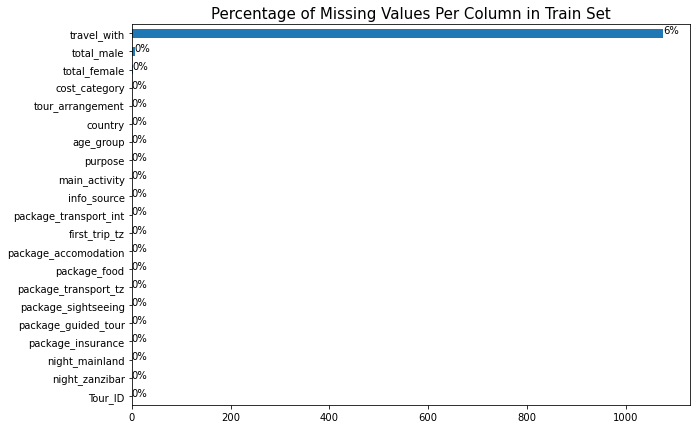

In [12]:
# Check if there any missing values in train set
ax = Train.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/Train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [14]:
Train.age_group.value_counts()

25-44    9047
45-64    5648
18-24    2222
65+      1467
<18       122
Name: age_group, dtype: int64

In [24]:
Train.country.value_counts()

UNITED STATES OF AMERICA    2846
UNITED KINGDOM              2120
ITALY                       1625
FRANCE                      1064
GERMANY                      969
                            ... 
ERITREA                        1
NIGER                          1
ESTONIA                        1
CAPE VERDE                     1
JORDAN                         1
Name: country, Length: 131, dtype: int64